## IRIS_DATASET_K-MEANS_VS_NB

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
# Loading built-in Datasets:
iris = sns.load_dataset("iris")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"], columns="count")    

iris_outcome

col_0,count
species,
setosa,50
versicolor,50
virginica,50


### EDA

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


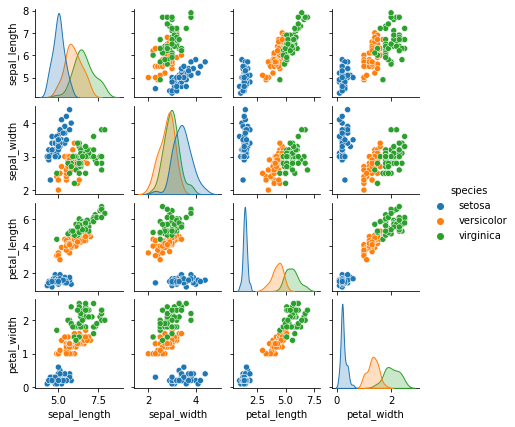

In [5]:
sns.pairplot(iris, hue='species', size=1.5);

### IRIS data using KMeans method

In [6]:
X = iris.iloc[:, [0, 1, 2, 3]].values

Using the elbow method to determine the optimal number of clusters for k-means clustering

### Implementing K-Means Clustering

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [8]:
iris['species'] = iris['species'].map({'setosa':1,'versicolor':2,'virginica':0})

In [9]:
y = iris['species']

In [10]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

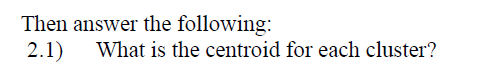

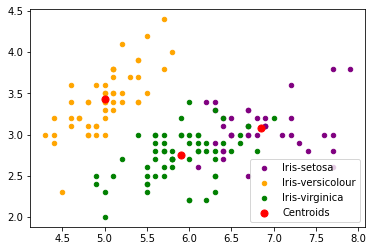

In [11]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

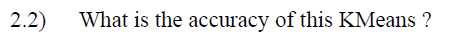

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

print('accuracy_score:',(accuracy_score(y_kmeans, iris['species'])))
print('confusion_matrix\n',(confusion_matrix(y_kmeans, iris['species'])))
print(classification_report(y_kmeans, iris['species']))

accuracy_score: 0.8933333333333333
confusion_matrix
 [[36  0  2]
 [ 0 50  0]
 [14  0 48]]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82        38
           1       1.00      1.00      1.00        50
           2       0.96      0.77      0.86        62

    accuracy                           0.89       150
   macro avg       0.89      0.91      0.89       150
weighted avg       0.91      0.89      0.89       150



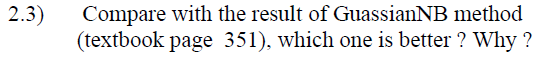

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10) #I choosed random_state = 10

In [14]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                # 3. fit model to data
y_model = model.predict(X_test)            # 4. predict on test data

In [15]:
print('accuracy_score:',(accuracy_score(y_model, y_test)))
print('confusion_matrix\n',(confusion_matrix(y_model, y_test)))
print(classification_report(y_model, y_test))

accuracy_score: 1.0
confusion_matrix
 [[12  0  0]
 [ 0 11  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



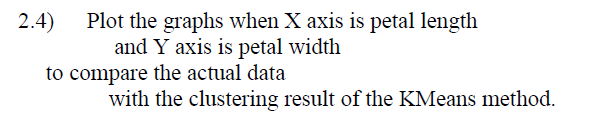

In [16]:
X = iris.iloc[:, [2, 3]].values

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [18]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Predict

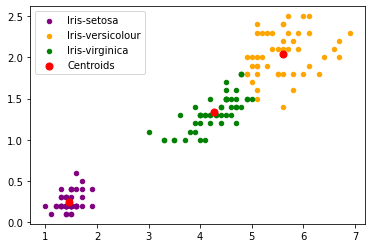

In [19]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

## Actual Data

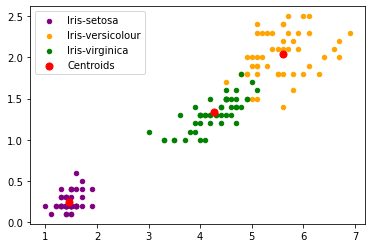

In [20]:
#Visualising the clusters
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 20, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 20, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 20, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

In [21]:
# Reset label to same test set
iris['species'] = iris['species'].map({1:0,2:2,0:1})

In [22]:
#Actual value and the predicted value
iris_frame = pd.DataFrame({'Actual value': iris['species'], 'Predicted value': y_kmeans})

# First 50 is not miss prediction
iris_frame.head(50)

,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [23]:
# see some wrong pridict
iris_frame.tail(50)

,Actual value,Predicted value
100,1,1
101,1,1
102,1,1
103,1,1
104,1,1
105,1,1
106,1,2
107,1,1
108,1,1
109,1,1


## Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

print('accuracy_score:',(accuracy_score(y_kmeans, iris['species'])))
print('confusion_matrix\n',(confusion_matrix(y_kmeans, iris['species'])))
print(classification_report(y_kmeans, iris['species']))

accuracy_score: 0.96
confusion_matrix
 [[50  0  0]
 [ 0 46  2]
 [ 0  4 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        48
           2       0.96      0.92      0.94        52

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

